In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
from brian2.units import *
plt.viridis()
from matplotlib import animation, rc, colors
from IPython.display import HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import matplotlib as mlib
mlib.rcParams.update({'font.size': 22})
mlib.rcParams.update({'errorbar.capsize': 5})

In [57]:
# Case 1
# data = np.load("C:/Work/phD/synaptogenesis/mnist_case_1.npz") # f_mean = 10
# data = np.load("C:/Work/phd/synaptogenesis/mnist_case_1_5hz_rate_rand.npz")

# Case 2
# data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/case_2_mnist_training.npz")
# data = np.load("C:/Work/phd/synaptogenesis/mnist_case_2_5hz_rate_smax_96.npz")



# Case 3
# data = np.load("C:/Work/phd/synaptogenesis/case_3_mnist.npz")
# data = np.load("C:/Work/phd/synaptogenesis/mnist_case_3_5hz.npz")
# data = np.load("C:/Work/phd/synaptogenesis/mnist_case_3_5hz_rate_smax_64.npz")
# data = np.load("C:/Work/phd/synaptogenesis/mnist_case_3_5hz_rate_smax_96.npz")
# data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/mnist_case_3_5hz_rate_smax_96_sigma_lat_2.npz")
data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/mnist_case_1_5hz_rate_smax_96_sigma_lat_2.npz")
# data = np.load("C:/Work/phd/synaptogenesis/mnist_case_3_rate_based_test_pull_request.npz")
# data = np.load("C:/Work/phd/synaptogenesis/mnist_case_3_rate_based_lat_lat_conn.npz")



# data = np.load("C:/Work/phd/synaptogenesis/mnist_case_3_5hz_rate_rand.npz")


# data = np.load("C:/Work/phd/synaptogenesis/mnist_case_2_5hz.npz")

# data = np.load("C:/Work/phd/synaptogenesis/mnist_case_3_5hz_cs.npz")


# XPS test case 3
# data = np.load("C:/Work/phd/synaptogenesis/mnist_case_3_xps.npz")


    
simtime = data['simtime'].ravel()[0]
from pprint import pprint as pp
pp(data['sim_params'].ravel()[0])

{'a_minus': 0.12,
 'a_plus': 0.1,
 'b': 1.2,
 'case': 1,
 'cell_params': {'cm': 20.0,
                 'e_rev_E': 0.0,
                 'e_rev_I': -80.0,
                 'i_offset': 0.0,
                 'tau_m': 20.0,
                 'tau_refrac': 5.0,
                 'tau_syn_E': 5.0,
                 'tau_syn_I': 15.0,
                 'v_reset': -70.0,
                 'v_rest': -70.0,
                 'v_thresh': -50.0},
 'delay': 1,
 'f_base': 5,
 'f_mean': 5.0,
 'f_peak': 60,
 'f_rew': 10000,
 'g_max': 0.1,
 'grid': array([28, 28], dtype=int64),
 'input_type': 1,
 'lateral_inhibition': 1,
 'lesion': 0,
 'p_elim_dep': 0.0245,
 'p_elim_pot': 0.00013600000000000003,
 'p_form_forward': 0.16,
 'p_form_lateral': 1,
 'random_partner': False,
 's_max': 96,
 'sigma_form_forward': 2.5,
 'sigma_form_lateral': 2.0,
 'sigma_stim': 2,
 'simtime': 300000,
 't_minus': 20.0,
 't_plus': 20.0,
 't_record': 300000,
 't_stim': 200,
 'tau_refrac': 5.0}


In [58]:
post_spikes = data['post_spikes']

In [59]:
# data.close()
data.files

['sim_params',
 'total_time',
 'init_lat_connections',
 'post_spikes',
 'final_pre_weights',
 'testing_file',
 'init_ff_connections',
 'lat_connections',
 'testing_numbers',
 'ff_connections',
 'exception',
 'pre_spikes',
 'final_post_weights',
 'random_input',
 'simtime']

In [60]:
rates_for_number = np.zeros((10, 28**2))

for number in range(10):
    for neuron_id in range(28**2):
        rates_for_number[number, neuron_id] = np.count_nonzero(
            post_spikes[number][:, 0] == neuron_id)

[ 2229.] [ 0.]


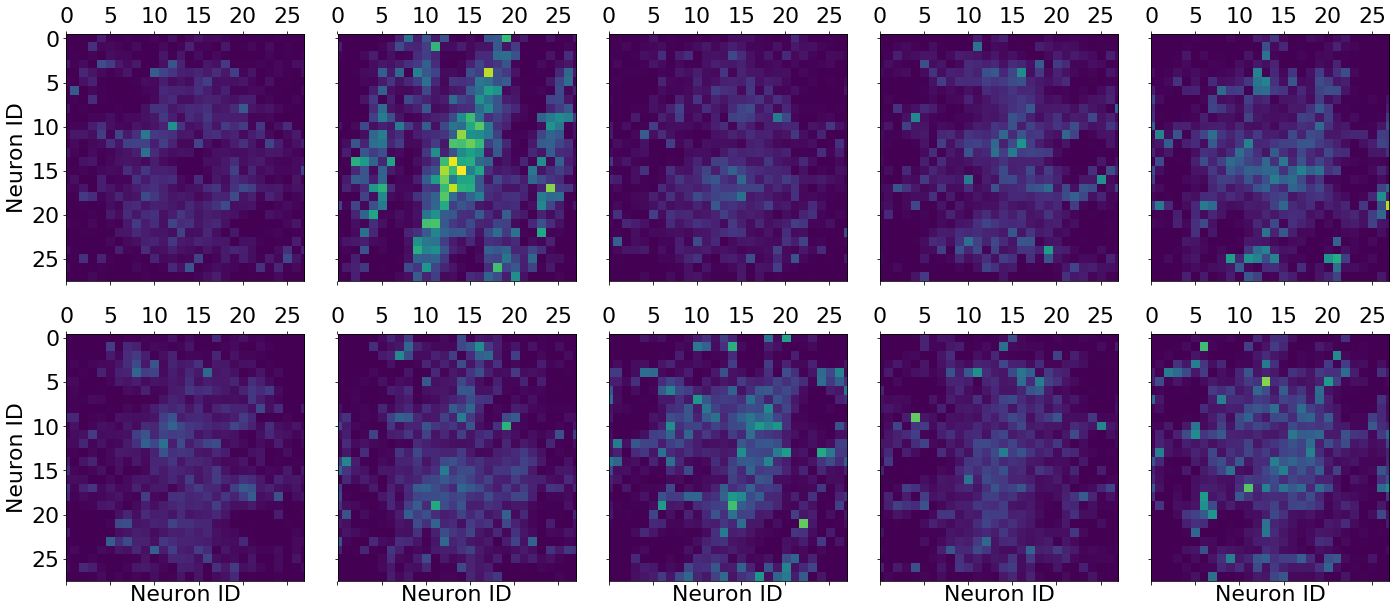

In [61]:
fig_conn, axes = plt.subplots(2, 5,figsize=(20, 9), dpi=800, sharey=True)

silly_ax = []
maximus = [-1]
minimus = [2**31]

for index, val in np.ndenumerate(axes):
    x, y = index
    source_weighted_hits = rates_for_number[x*5+y, :].reshape(28, 28)
    maximus = np.maximum(maximus, source_weighted_hits.max())
    minimus = np.minimum(minimus, source_weighted_hits.min())

    silly_ax.append(axes[x, y].matshow(source_weighted_hits))

# ff_conn_ax = axes[0, 0].matshow(source_hits.reshape(28, 28))
# weighted_conn_ax = axes[1, 1].matshow(source_weighted_hits.reshape(28, 28))
print maximus, minimus

# ax1.set_title("Hits\n")
# ax1.set_xlabel("Neuron ID")
axes[0, 0].set_ylabel("Neuron ID")
# ax2.set_title("Weighted hits\n")
# ax2.set_xlabel("Neuron ID")
axes[1, 0].set_ylabel("Neuron ID")

for arg in range(5):
    axes[1, arg].set_xlabel("Neuron ID")
    
norm = colors.Normalize(vmin=minimus, vmax=maximus)
for index, val in np.ndenumerate(axes):
    x, y = index
    silly_ax[x*5+y].set_norm(norm)
# fig_conn.subplots_adjust(right=0.8)
# cbar_ax = fig_conn.add_axes([0.85, 0.15, 0.05, 0.7])
# fig_conn.colorbar(silly_ax[4], cax=cbar_ax)

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# plt.colorbar(silly_ax[4], cax=cax)

plt.tight_layout()
plt.savefig("total_target_hits_rate_based.pdf", dpi=800)
# plt.savefig("total_target_hits_rate_based.eps", dpi=800)
plt.show()

In [62]:
final_ff_conn = data['ff_connections'][-10:]
final_lat_conn = data['lat_connections'][-10:]
print final_ff_conn.shape
print final_lat_conn.shape

(10L,)
(10L,)


In [63]:
final_ff_conn[0].shape

(27723L, 4L)

In [64]:
conn_list = final_ff_conn[6]

In [65]:
source_hits = np.empty(28**2)
source_weighted_hits = np.empty(28**2)
for i in range(28**2):
    source_hits[i] = np.count_nonzero(conn_list[:, 0]==i)
#     print conn_list[conn_list[:, 0]==i]
    source_weighted_hits[i] = np.sum(conn_list[conn_list[:, 0]==i, 2])

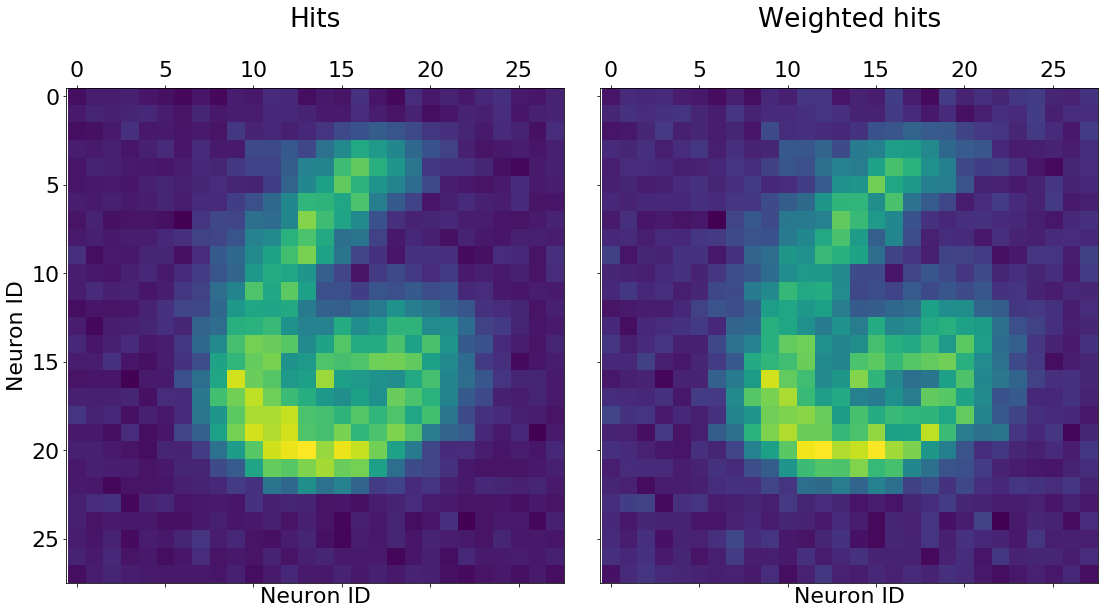

In [66]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,9), dpi=800, sharey=True)
    

ff_conn_ax = ax1.matshow(source_hits.reshape(28, 28))
weighted_conn_ax = ax2.matshow(source_weighted_hits.reshape(28, 28))

ax1.set_title("Hits\n")
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
ax2.set_title("Weighted hits\n")
ax2.set_xlabel("Neuron ID")
# ax2.set_ylabel("Neuron ID")

plt.tight_layout()

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)
# cbar.set_label("Number of hits", fontsize=14)
plt.show()

[ 11.73254395] [ 0.2321167]


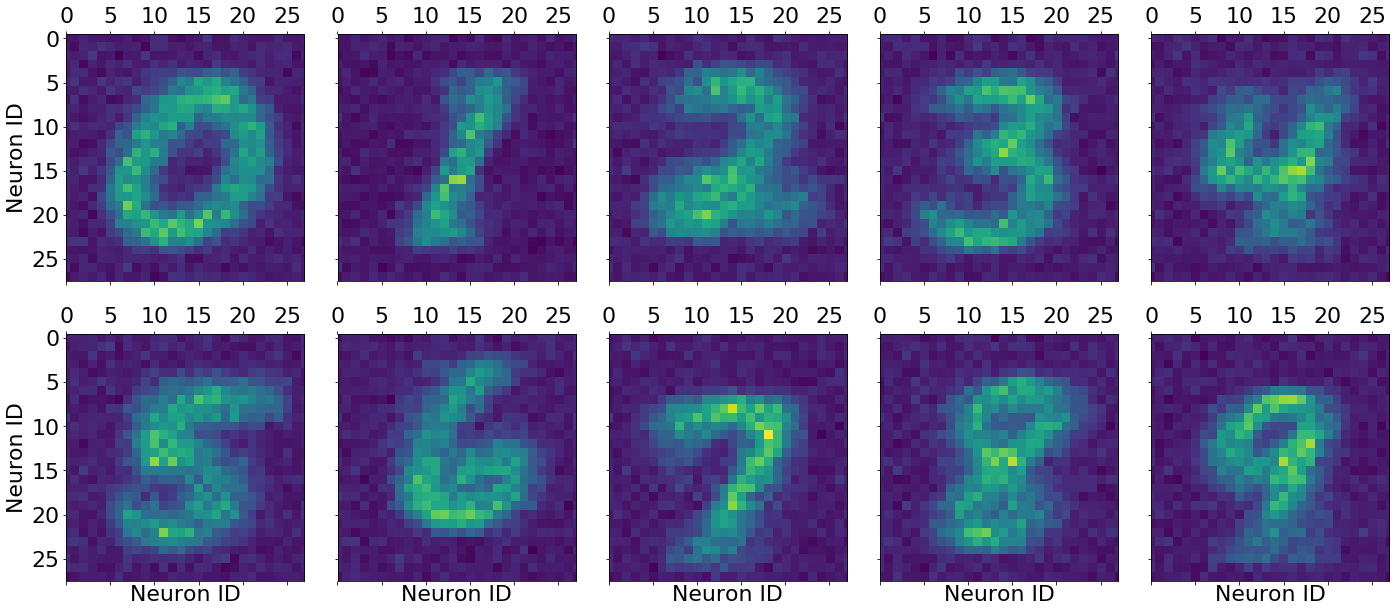

In [67]:
fig_conn, axes = plt.subplots(2, 5,figsize=(20, 9), dpi=800, sharey=True)

silly_ax = []
maximus = [-1]
minimus = [2**31]

for index, val in np.ndenumerate(axes):
    x, y = index
    source_weighted_hits = np.empty(28**2)
    conn_list = final_ff_conn[x*5+y]
    for i in range(28**2):
        source_weighted_hits[i] = np.sum(conn_list[conn_list[:, 0]==i, 2])
    maximus = np.maximum(maximus, source_weighted_hits.max())
    minimus = np.minimum(minimus, source_weighted_hits.min())

    silly_ax.append(axes[x, y].matshow(source_weighted_hits.reshape(28, 28)))

# ff_conn_ax = axes[0, 0].matshow(source_hits.reshape(28, 28))
# weighted_conn_ax = axes[1, 1].matshow(source_weighted_hits.reshape(28, 28))
print maximus, minimus

# ax1.set_title("Hits\n")
# ax1.set_xlabel("Neuron ID")
axes[0, 0].set_ylabel("Neuron ID")
# ax2.set_title("Weighted hits\n")
# ax2.set_xlabel("Neuron ID")
axes[1, 0].set_ylabel("Neuron ID")

for arg in range(5):
    axes[1, arg].set_xlabel("Neuron ID")
    
norm = colors.Normalize(vmin=minimus, vmax=maximus)
for index, val in np.ndenumerate(axes):
    x, y = index
    silly_ax[x*5+y].set_norm(norm)
# fig_conn.subplots_adjust(right=0.8)
# cbar_ax = fig_conn.add_axes([0.85, 0.15, 0.05, 0.7])
# fig_conn.colorbar(silly_ax[4], cax=cbar_ax)

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# plt.colorbar(silly_ax[4], cax=cax)

plt.tight_layout()
plt.savefig("all_digits_weighted_rate_based.pdf", dpi=800)
# plt.savefig("all_digits_weighted_rate_based.eps", dpi=800)
plt.show()

[ 242.] [ 3.]


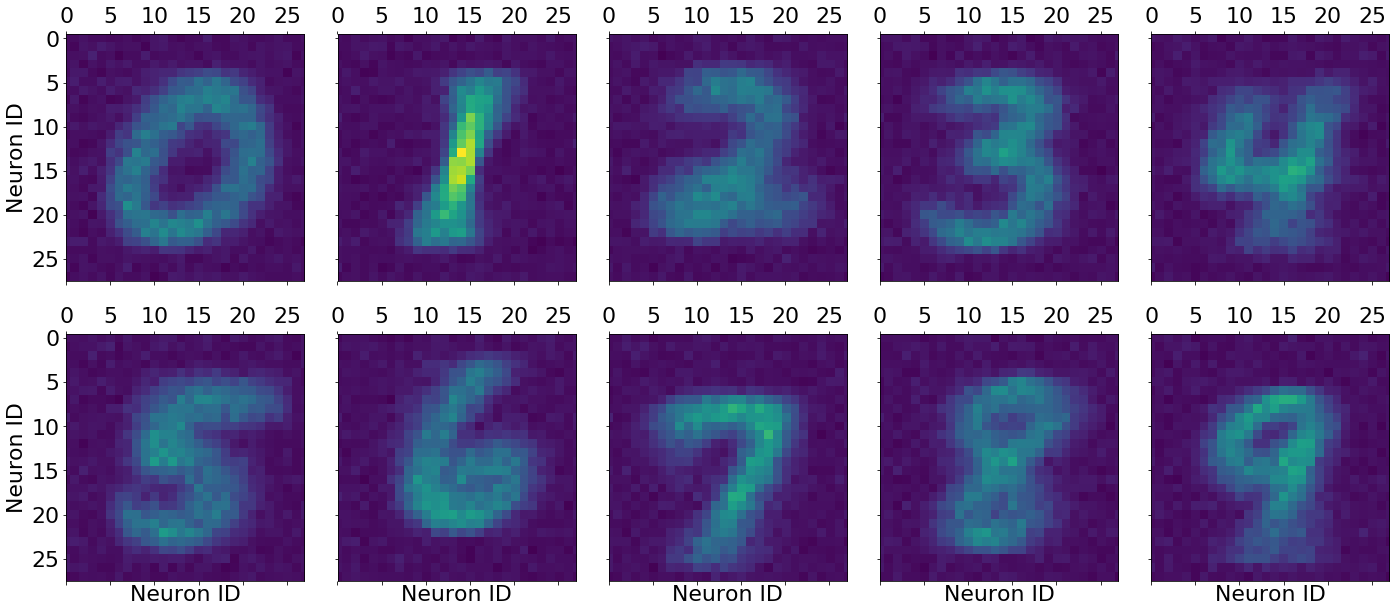

In [68]:
fig_conn, axes = plt.subplots(2, 5,figsize=(20, 9), dpi=800, sharey=True)

silly_ax = []
maximus = [-1]
minimus = [2**31]

for index, val in np.ndenumerate(axes):
    x, y = index
    source_weighted_hits = np.empty(28**2)
    conn_list = final_ff_conn[x*5+y]
    for i in range(28**2):
        source_hits[i] = np.count_nonzero(conn_list[:, 0]==i)
    maximus = np.maximum(maximus, source_hits.max())
    minimus = np.minimum(minimus, source_hits.min())

    silly_ax.append(axes[x, y].matshow(source_hits.reshape(28, 28)))

# ff_conn_ax = axes[0, 0].matshow(source_hits.reshape(28, 28))
# weighted_conn_ax = axes[1, 1].matshow(source_weighted_hits.reshape(28, 28))
print maximus, minimus

# ax1.set_title("Hits\n")
# ax1.set_xlabel("Neuron ID")
axes[0, 0].set_ylabel("Neuron ID")
# ax2.set_title("Weighted hits\n")
# ax2.set_xlabel("Neuron ID")
axes[1, 0].set_ylabel("Neuron ID")

for arg in range(5):
    axes[1, arg].set_xlabel("Neuron ID")
    
norm = colors.Normalize(vmin=minimus, vmax=maximus)
for index, val in np.ndenumerate(axes):
    x, y = index
    silly_ax[x*5+y].set_norm(norm)
# fig_conn.subplots_adjust(right=0.8)
# cbar_ax = fig_conn.add_axes([0.85, 0.15, 0.05, 0.7])
# fig_conn.colorbar(silly_ax[4], cax=cbar_ax)

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# plt.colorbar(silly_ax[4], cax=cax)

plt.tight_layout()
plt.savefig("all_digits_rate_based.pdf", dpi=800)
# plt.savefig("all_digits_rate_based.eps", dpi=800)
plt.show()

In [69]:
fan_ins_per_number = []
for index, val in np.ndenumerate(axes):
    x, y = index
    weighted_fan_in = np.empty(28**2)
    fan_in =  np.empty(28**2)
    lat_weighted_fan_in = np.empty(28**2)
    lat_fan_in =  np.empty(28**2)
    
    conn_list = final_ff_conn[x*5+y]
    lat_conn_list = final_lat_conn[x*5+y]
    for i in range(28**2):
        fan_in[i] = np.count_nonzero(conn_list[:, 1]==i)
        weighted_fan_in[i] = np.sum(conn_list[conn_list[:, 1]==i, 2])
        lat_fan_in[i] = np.count_nonzero(lat_conn_list[:, 1]==i)
        lat_weighted_fan_in[i] = np.sum(lat_conn_list[lat_conn_list[:, 1]==i, 2])
    fan_ins_per_number.append((fan_in, weighted_fan_in, lat_fan_in, lat_weighted_fan_in))

In [18]:
fan_ins_per_number = np.asarray(fan_ins_per_number)

In [19]:
print np.mean(fan_ins_per_number[0][0])
print np.mean(fan_ins_per_number[0][1])
print np.mean(fan_ins_per_number[0][2])
print np.mean(fan_ins_per_number[0][3])

33.7270408163
3.37188066755
14.2602040816
1.42739946015


In [20]:
for number_id in range(10):
    print "{:25s}".format("Average ff fan_in for "), number_id, "is", np.mean(fan_ins_per_number[number_id][0])
    print "{:25s}".format("Average lat fan_in for "), number_id, "is", np.mean(fan_ins_per_number[number_id][2])
    print "{:25s}".format("Total ff conn for "), number_id, "is", np.sum(fan_ins_per_number[number_id, 0])
    print "{:25s}".format("Connectivity percentage (FF)"), number_id, "is",  (np.sum(fan_ins_per_number[number_id, 0])*100.) / (28**4)
    print "{:25s}".format("Total lat conn for "), number_id, "is", np.sum(fan_ins_per_number[number_id, 2])
    print "{:25s}".format("TOTAL conn for "), number_id, "is", np.sum(fan_ins_per_number[number_id, 2]) + np.sum(fan_ins_per_number[number_id, 0])
    print "{:25s}".format("Connectivity percentage "), number_id, "is",  ((np.sum(fan_ins_per_number[number_id, 0])+ np.sum(fan_ins_per_number[number_id, 2]))*100.) / (28**4*2)
    print

Average ff fan_in for     0 is 33.7270408163
Average lat fan_in for    0 is 14.2602040816
Total ff conn for         0 is 26442.0
Connectivity percentage (FF) 0 is 4.30191847147
Total lat conn for        0 is 11180.0
TOTAL conn for            0 is 37622.0
Connectivity percentage   0 is 3.06041102666

Average ff fan_in for     1 is 26.9604591837
Average lat fan_in for    1 is 24.7359693878
Total ff conn for         1 is 21137.0
Connectivity percentage (FF) 1 is 3.43883407955
Total lat conn for        1 is 19393.0
TOTAL conn for            1 is 40530.0
Connectivity percentage   1 is 3.29696610787

Average ff fan_in for     2 is 33.4017857143
Average lat fan_in for    2 is 14.7321428571
Total ff conn for         2 is 26187.0
Connectivity percentage (FF) 2 is 4.26043185131
Total lat conn for        2 is 11550.0
TOTAL conn for            2 is 37737.0
Connectivity percentage   2 is 3.06976585277

Average ff fan_in for     3 is 32.4234693878
Average lat fan_in for    3 is 16.1007653061
Total f

In [21]:
centre_location = int(28**2 / 2.) + 14
side_centre_location = 28 * 14
print "centre location ", centre_location
print "side centre location ", side_centre_location

centre location  406
side centre location  392


In [22]:
fan_in_for_good = final_ff_conn[1]
centre_pres = fan_in_for_good[fan_in_for_good[:, 1] == centre_location]
side_centre_pres = fan_in_for_good[fan_in_for_good[:, 1] == side_centre_location]

In [23]:
centre_fan_in = np.zeros(28**2)
side_centre_fan_in = np.zeros(28**2)
for x in centre_pres[:,0]:
    centre_fan_in[int(x)]+=1 
for x in side_centre_pres[:,0]:
    side_centre_fan_in[int(x)]+=1 

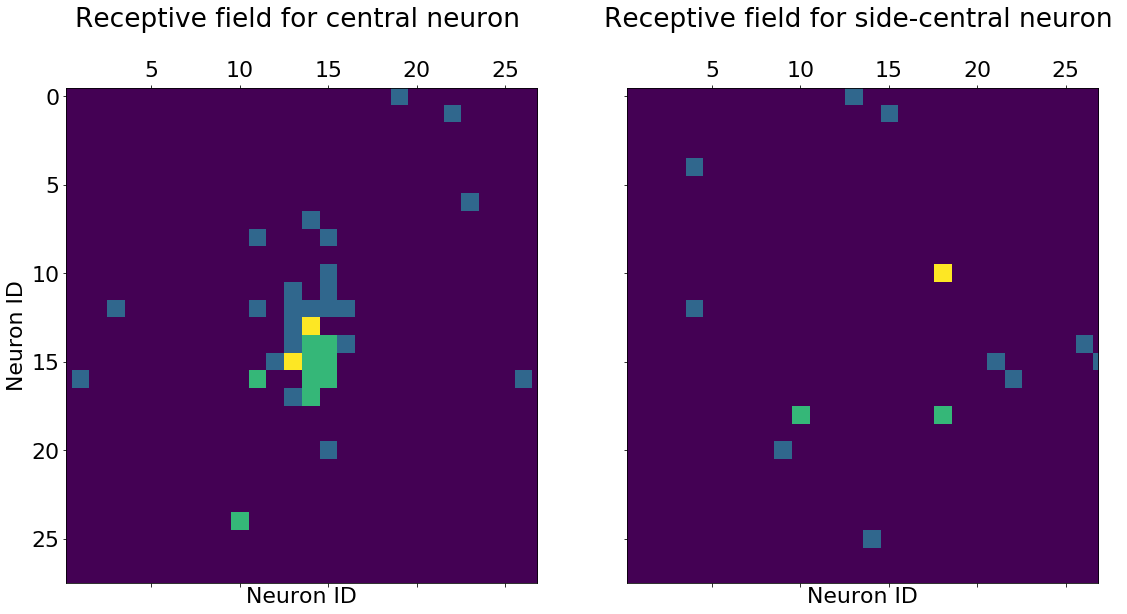

In [24]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16.5,9), dpi=800, sharey=True)
    

    
ff_conn_ax = ax1.matshow(centre_fan_in.reshape(28,28))
weighted_conn_ax = ax2.matshow(side_centre_fan_in.reshape(28,28))

ax1.set_title("Receptive field for central neuron \n")
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
ax2.set_title("Receptive field for side-central neuron \n")
ax2.set_xlabel("Neuron ID")
# ax2.set_ylabel("Neuron ID")

plt.tight_layout()

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)
# cbar.set_label("Number of hits", fontsize=14)
plt.savefig("centre_neuron_receptive_field_rate.png", dpi=600)
plt.show()

In [26]:
# CASE 1        --------------------------------------
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_1.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_1_5hz_rate_rand.npz")
# ----------------------------------------------------





# CASE 2        --------------------------------------

# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_2_5hz.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_2_5hz_rate_smax_96.npz")
# ----------------------------------------------------






# CASE 3        --------------------------------------
# testing_data = np.load("C:/Work/phd/synaptogenesis/case_3_mnist_testing.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_3_5hz.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_3_5hz_rate_smax_64.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_3_5hz_rate_smax_96.npz")
testing_data = np.load("D:/Work/Neurogenesis-PhD//synaptogenesis/testing_mnist_case_3_5hz_rate_smax_96_sigma_lat_2.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_3_rate_based_test_pull_request.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_3_rate_based_lat_lat_conn.npz")



# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_3_5hz_rate_20ms.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_3_5hz_rate_rand.npz")

# ----------------------------------------------------





# Pumping Noise! --------------------------------------
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_3_5hz_rate_smax_64_rand_input.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_2_5hz_random_input_w_case_3_conn.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_3_5hz_rate_smax_96_sigma_lat_2_rand_input.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_3_5hz_random_input.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_3_5hz_rate_smax_96_sigma_lat_2_rand_input_no_lat.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_2_5hz_rate_smax_96_rand_input.npz")

# -----------------------------------------------------



# Trained w/ lateral inhibition, tested w/o
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_3_5hz_rate_smax_96_sima_lat_2_no_lat.npz")

simtime = testing_data['simtime'].ravel()[0]
from pprint import pprint as pp
pp(testing_data['sim_params'].ravel()[0])
print "Random input:", testing_data['random_input']

{'a_minus': 0.12,
 'a_plus': 0.1,
 'b': 1.2,
 'case': 3,
 'cell_params': {'cm': 20.0,
                 'e_rev_E': 0.0,
                 'e_rev_I': -80.0,
                 'i_offset': 0.0,
                 'tau_m': 20.0,
                 'tau_refrac': 5.0,
                 'tau_syn_E': 5.0,
                 'tau_syn_I': 15.0,
                 'v_reset': -70.0,
                 'v_rest': -70.0,
                 'v_thresh': -50.0},
 'delay': 1,
 'f_base': 5,
 'f_mean': 5.0,
 'f_peak': 60,
 'f_rew': 10000,
 'g_max': 0.1,
 'grid': array([28, 28], dtype=int64),
 'input_type': 1,
 'lateral_inhibition': 1,
 'lesion': 0,
 'p_elim_dep': 0.0245,
 'p_elim_pot': 0.00013600000000000003,
 'p_form_forward': 0.16,
 'p_form_lateral': 1,
 'random_partner': False,
 's_max': 96,
 'sigma_form_forward': 2.5,
 'sigma_form_lateral': 1,
 'sigma_stim': 2,
 'simtime': 300000,
 't_minus': 20.0,
 't_plus': 20.0,
 't_record': 300000,
 't_stim': 200,
 'tau_refrac': 5.0}
Random input: False


In [27]:
# testing_data.close()

In [28]:
testing_numbers = testing_data['testing_numbers']

In [29]:
print testing_numbers
print testing_numbers.size

[4 2 4 ..., 1 0 6]
1500


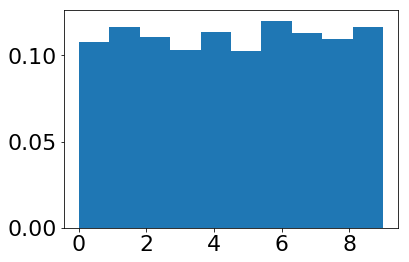

In [30]:
plt.hist(testing_data['testing_numbers'], normed=1)
plt.show()

In [31]:
post_spikes = testing_data['post_spikes']

In [32]:
assert post_spikes.shape[0] == 10

In [33]:
post_spikes_no_0 = post_spikes[0]
print post_spikes_no_0.shape[0] / (28**2 * 300 *second)

1.61772959 Hz


In [34]:
rates_for_number = np.zeros((10, 28**2))

for number in range(10):
    for neuron_id in range(28**2):
        rates_for_number[number, neuron_id] = np.count_nonzero(
            post_spikes[number][:, 0] == neuron_id)

[ 6729.] [ 0.]


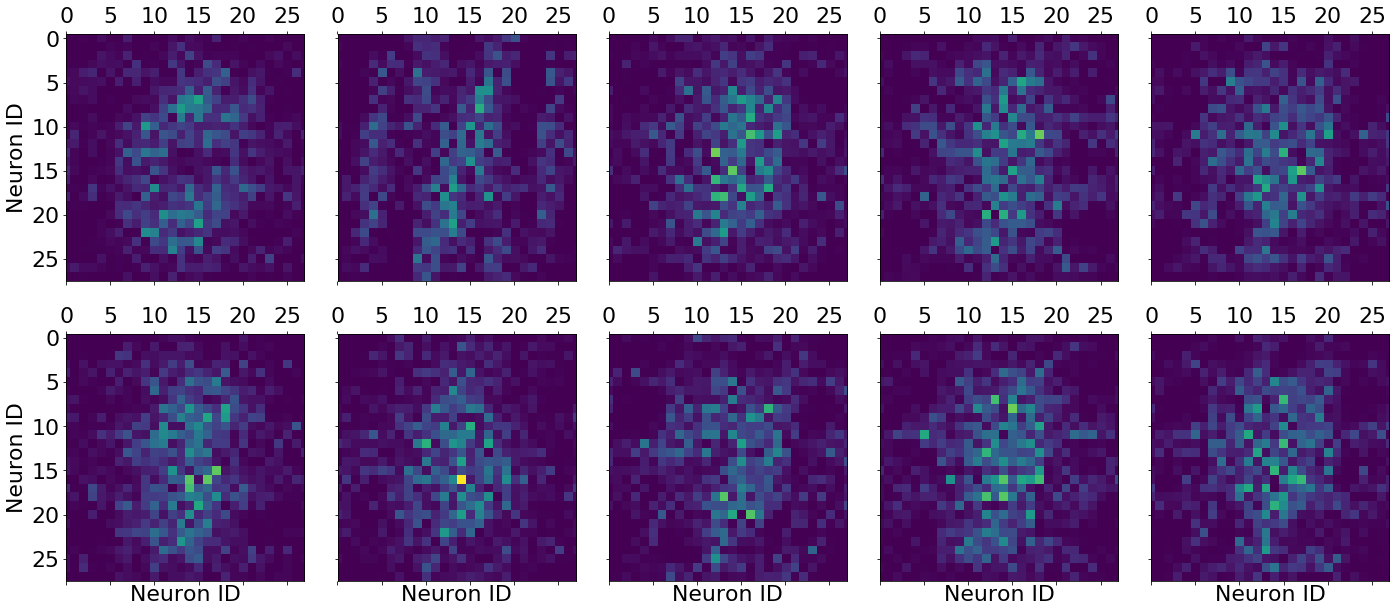

In [35]:
fig_conn, axes = plt.subplots(2, 5,figsize=(20, 9), dpi=800, sharey=True)

silly_ax = []
maximus = [-1]
minimus = [2**31]

for index, val in np.ndenumerate(axes):
    x, y = index
    source_weighted_hits = rates_for_number[x*5+y, :].reshape(28, 28)
    maximus = np.maximum(maximus, source_weighted_hits.max())
    minimus = np.minimum(minimus, source_weighted_hits.min())

    silly_ax.append(axes[x, y].matshow(source_weighted_hits))

# ff_conn_ax = axes[0, 0].matshow(source_hits.reshape(28, 28))
# weighted_conn_ax = axes[1, 1].matshow(source_weighted_hits.reshape(28, 28))
print maximus, minimus

# ax1.set_title("Hits\n")
# ax1.set_xlabel("Neuron ID")
axes[0, 0].set_ylabel("Neuron ID")
# ax2.set_title("Weighted hits\n")
# ax2.set_xlabel("Neuron ID")
axes[1, 0].set_ylabel("Neuron ID")

for arg in range(5):
    axes[1, arg].set_xlabel("Neuron ID")
    
norm = colors.Normalize(vmin=minimus, vmax=maximus)
for index, val in np.ndenumerate(axes):
    x, y = index
    silly_ax[x*5+y].set_norm(norm)
# fig_conn.subplots_adjust(right=0.8)
# cbar_ax = fig_conn.add_axes([0.85, 0.15, 0.05, 0.7])
# fig_conn.colorbar(silly_ax[4], cax=cbar_ax)

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# plt.colorbar(silly_ax[4], cax=cax)

plt.tight_layout()
plt.savefig("total_target_hits_rate_based_during_testing.png", dpi=800)
# plt.savefig("total_target_hits_rate_based.eps", dpi=800)
plt.show()

In [36]:
chunk = 200
instaneous_rates = np.empty((10, 300000//chunk))

In [37]:
for index, value in np.ndenumerate(instaneous_rates):
    number_index, chunk_index = index
    instaneous_rates[number_index, chunk_index] = np.count_nonzero(
            np.logical_and(
                post_spikes[number_index][:, 1] >= (chunk_index * chunk), 
                post_spikes[number_index][:, 1] <= ((chunk_index+1) * chunk)
            )
        ) / (28**2 * chunk *ms)

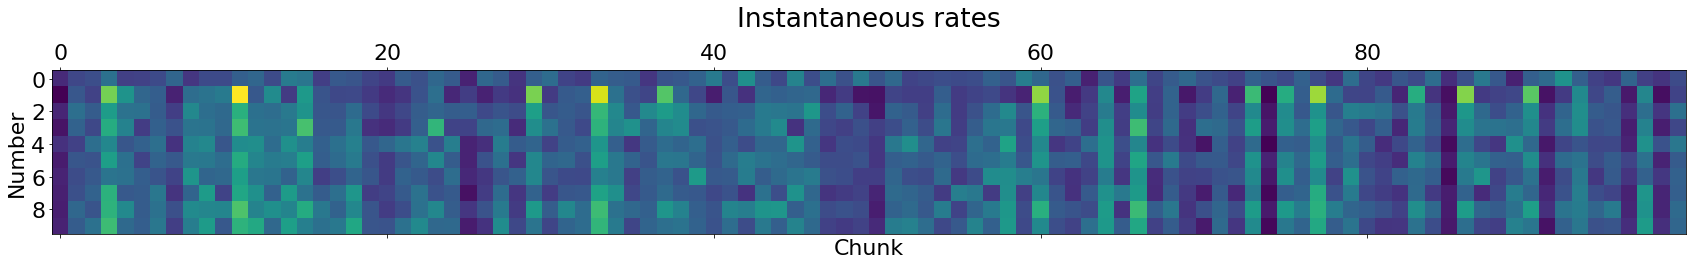

In [38]:
fig_conn, ax1 = plt.subplots(1, 1,figsize=(24,8), dpi=600)
    

ff_conn_ax = ax1.matshow(instaneous_rates[:, :100])

ax1.set_title("Instantaneous rates\n")
ax1.set_xlabel("Chunk")
ax1.set_ylabel("Number")
plt.tight_layout()
plt.savefig("instaneous_rates_rate_based.png", dpi=600)

In [39]:
np.mean(instaneous_rates,axis=1)

array([ 1.62593112,  1.68516156,  1.88343963,  1.93002551,  1.80131803,
        1.92113095,  1.73454932,  1.73957058,  2.06657738,  1.93615221])

In [40]:
what_network_thinks = np.empty(300000//chunk)
for i in range(what_network_thinks.shape[0]):
    what_network_thinks[i] = np.argmax(instaneous_rates[:, i])

In [41]:
what_network_thinks

array([ 4.,  2.,  9., ...,  1.,  0.,  3.])

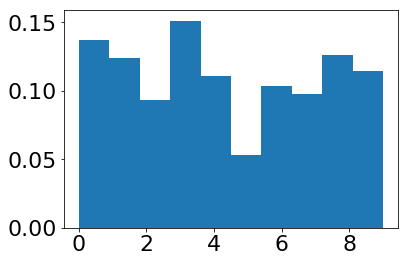

In [42]:
n, bins, patches = plt.hist(what_network_thinks, normed=1)
plt.show()

In [43]:
n

array([ 0.13703704,  0.1237037 ,  0.09333333,  0.15111111,  0.11111111,
        0.05333333,  0.1037037 ,  0.09777778,  0.12592593,  0.11407407])

In [44]:
# sanity check
print what_network_thinks.size 
print testing_data['testing_numbers'].size
assert what_network_thinks.size == testing_data['testing_numbers'].size

1500
1500


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testing_data['testing_numbers'], what_network_thinks,  labels=range(10))

In [46]:
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)

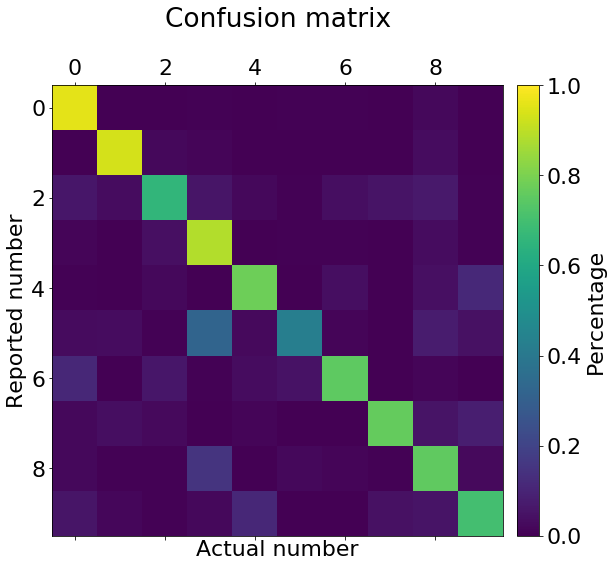

In [51]:
fig_conn, ax1 = plt.subplots(1, 1,figsize=(9,9), dpi=800)
    

ff_conn_ax = ax1.matshow(confusion_matrix, vmin=0, vmax=1)

ax1.set_title("Confusion matrix\n")
ax1.set_xlabel("Actual number")
ax1.set_ylabel("Reported number")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(ff_conn_ax, cax=cax)
cbar.set_label("Percentage")

plt.tight_layout()
plt.savefig("mnist_confusion_matrix_rate_based.pdf", bbox_inches='tight', dpi=800)

In [52]:
accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
print accuracy
recall = np.trace(confusion_matrix) / np.sum(confusion_matrix)
print recall

0.760347905546
0.760347905546


In [53]:
print classification_report(testing_data['testing_numbers'], what_network_thinks)

             precision    recall  f1-score   support

          0       0.75      0.96      0.84       145
          1       0.88      0.94      0.91       157
          2       0.78      0.66      0.71       149
          3       0.60      0.88      0.72       139
          4       0.79      0.78      0.79       153
          5       0.82      0.43      0.56       138
          6       0.87      0.75      0.81       162
          7       0.88      0.76      0.82       152
          8       0.66      0.76      0.70       148
          9       0.71      0.70      0.71       157

avg / total       0.78      0.76      0.76      1500



In [54]:
cr  = classification_report(testing_data['testing_numbers'], what_network_thinks)

In [55]:
rmse = np.sqrt(np.mean((testing_data['testing_numbers'] - what_network_thinks)**2))

In [56]:
print "RMSE", rmse

RMSE 2.0461345671
